<a href="https://colab.research.google.com/github/Simone-Lemes/Maratona-Behind-the-Code-2020/blob/main/Desafio_1_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O desafio consiste na elaboração de um modelo de Machine Learning para predição de risco de empréstimo, baseado em informações bancárias. Você deverá explorar os dados, tratá-los, e construir o modelo para predição.

O modelo deve receber como entrada os seguintes dados:

[
  "ID",
  "CHECKING_BALANCE",
  "PAYMENT_TERM",
  "CREDIT_HISTORY",
  "LOAN_PURPOSE",
  "LOAN_AMOUNT",
  "EXISTING_SAVINGS",
  "EMPLOYMENT_DURATION",
  "INSTALLMENT_PERCENT",
  "SEX",
  "OTHERS_ON_LOAN",
  "CURRENT_RESIDENCE_DURATION",
  "PROPERTY",
  "AGE",
  "INSTALLMENT_PLANS",
  "HOUSING",
  "EXISTING_CREDITS_COUNT",
  "JOB_TYPE",
  "DEPENDENTS",
  "TELEPHONE",
  "FOREIGN_WORKER"
]

In [1]:
# Em seguida iremos importar diversas bibliotecas que serão utilizadas:

# Pacote para trabalhar com JSON
import json

# Pacote para realizar requisições HTTP
import requests

# Pacote para exploração e análise de dados
import pandas as pd

# Pacote com métodos numéricos e representações matriciais
import numpy as np

# Pacote para construção de modelo baseado na técnica Gradient Boosting
import xgboost as xgb

# Pacotes do scikit-learn para pré-processamento de dados
# "SimpleImputer" é uma transformação para preencher valores faltantes em conjuntos de dados
from sklearn.impute import SimpleImputer

# Pacotes do scikit-learn para treinamento de modelos e construção de pipelines
# Método para separação de conjunto de dados em amostras de treino e teste
from sklearn.model_selection import train_test_split
# Método para criação de modelos baseados em árvores de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Classe para a criação de uma pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Pacotes do scikit-learn para avaliação de modelos
# Métodos para validação cruzada do modelo criado
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('/content/LOANS.csv') 

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0
...,...,...,...,...,...,...,...,...
3994,636739,450.0,BANK,3.0,CAR_NEW,3007.0,CO-APPLICANT,0
3995,919733,510.0,NONE,4.0,VACATION,4191.0,GUARANTOR,1
3996,115839,124.0,STORES,1.0,FURNITURE,250.0,NONE,1
3997,1128684,961.0,BANK,3.0,BUSINESS,5172.0,NONE,1


PAYMENT TERM  =  PRAZO DE PAGAMENTO

INSTALLMENT PLANS  =  PLANOS DE PARCELAMENTO

INSTALLMENT PERCENT  =  PARCELAMENTO PERCENTUAL

LOAN PURPOSE = PROPÓSITO DE EMPRÉSTIMO

LOAN AMOUNT = VALOR DO EMPRÉSTIMO

OTHERS ON LOAN = OUTROS EMPRESTADOS

ALLOW = PERMITIR

STORES = LOJAS

CAR USED = CARRO USADO

CAR_NEW = CARRO NOVO

CO-APPLICANT	= CO-CANDIDATO

GUARANTOR = AVALISTA


https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/

In [3]:
loans = pd.read_csv('/content/LOANS.csv')

In [4]:
loans.head()

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   3999 non-null   int64  
 1   PAYMENT_TERM         3975 non-null   float64
 2   INSTALLMENT_PLANS    3978 non-null   object 
 3   INSTALLMENT_PERCENT  3974 non-null   float64
 4   LOAN_PURPOSE         3979 non-null   object 
 5   LOAN_AMOUNT          3981 non-null   float64
 6   OTHERS_ON_LOAN       3977 non-null   object 
 7   ALLOW                3999 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 250.1+ KB


In [6]:
loans.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW
count,3.999000e+03,3975.000000,3974.000000,3981.000000,3999.000000
mean,6.603562e+05,653.796981,2.981379,3479.168802,0.664166
std,3.728332e+05,338.723239,1.121448,2489.961917,0.472340
min,9.800000e+01,120.000000,1.000000,250.000000,0.000000
25%,3.418460e+05,390.000000,2.000000,1330.000000,0.000000
50%,6.670610e+05,651.000000,3.000000,3237.000000,1.000000
75%,9.778745e+05,899.000000,4.000000,5334.000000,1.000000
max,1.320082e+06,1984.000000,6.000000,11676.000000,1.000000


Limpeza de dados

In [7]:
loans.isnull().sum()

ID                      0
PAYMENT_TERM           24
INSTALLMENT_PLANS      21
INSTALLMENT_PERCENT    25
LOAN_PURPOSE           20
LOAN_AMOUNT            18
OTHERS_ON_LOAN         22
ALLOW                   0
dtype: int64

In [8]:
loans.fillna(0,inplace = True)

In [9]:
loans.head()

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [10]:
loans.isnull().sum()

ID                     0
PAYMENT_TERM           0
INSTALLMENT_PLANS      0
INSTALLMENT_PERCENT    0
LOAN_PURPOSE           0
LOAN_AMOUNT            0
OTHERS_ON_LOAN         0
ALLOW                  0
dtype: int64

Amostragem Aleatória Simples

Criando uma amostra com apenas 10 registros a partir do conjunto de dados

Exemplo: Um professor quer sortear duas caixas de bombom entre os alunos de sua classe para isso ele coloca os nomes dos alunos em uma urna.

In [11]:
df_sample = loans.sample(n=10)

In [12]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 3970 to 2584
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10 non-null     int64  
 1   PAYMENT_TERM         10 non-null     float64
 2   INSTALLMENT_PLANS    10 non-null     object 
 3   INSTALLMENT_PERCENT  10 non-null     float64
 4   LOAN_PURPOSE         10 non-null     object 
 5   LOAN_AMOUNT          10 non-null     float64
 6   OTHERS_ON_LOAN       10 non-null     object 
 7   ALLOW                10 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 720.0+ bytes


Especificando o tamanho da amostra através do percentual

10% de 150 registros é igual a 15, da população total foram selecionados 15 registros aleatórios para compor o dataframe.

In [13]:
df_sample = loans.sample(frac=0.10)

In [14]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 2166 to 2276
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   400 non-null    int64  
 1   PAYMENT_TERM         400 non-null    float64
 2   INSTALLMENT_PLANS    400 non-null    object 
 3   INSTALLMENT_PERCENT  400 non-null    float64
 4   LOAN_PURPOSE         400 non-null    object 
 5   LOAN_AMOUNT          400 non-null    float64
 6   OTHERS_ON_LOAN       400 non-null    object 
 7   ALLOW                400 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 28.1+ KB


Amostragem Aleatória Estratificada

Exemplo: um conselho estudantil entrevista 100 alunos obtendo uma amostra aleatória de 25 calouros, 25 alunos do 1° ano, 25 alunos do 2° ano e 25 alunos do 3° ano.

In [15]:
loans['INSTALLMENT_PLANS'].value_counts()

NONE      2782
STORES     815
BANK       381
0           21
Name: INSTALLMENT_PLANS, dtype: int64

In [16]:
loans['LOAN_PURPOSE'].value_counts()

CAR_NEW       748
FURNITURE     690
CAR_USED      652
RADIO_TV      604
APPLIANCES    436
REPAIRS       229
VACATION      163
RETRAINING    130
EDUCATION     126
BUSINESS      114
OTHER          87
0              20
Name: LOAN_PURPOSE, dtype: int64

In [17]:
loans['OTHERS_ON_LOAN'].value_counts()

NONE            3306
CO-APPLICANT     576
GUARANTOR         95
0                 22
Name: OTHERS_ON_LOAN, dtype: int64

A variável destino para este desafio é a ALLOW, significando se um empréstimo deverá ser permitido ou não, baseado nas informações dadas. Vamos dar uma olhada em como está a distribuição dessa variável

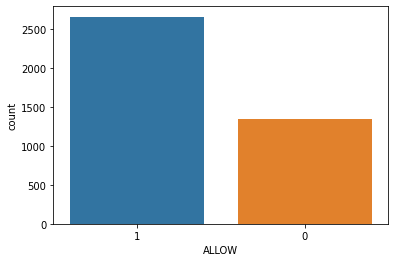

In [18]:
risk_plot = sns.countplot(data=loans, x='ALLOW', order=loans['ALLOW'].value_counts().index)

Sinta-se livre para ver a distribuição de outras colunas do conjunto de dados, utilizar os outros conjuntos de dados, explorar as correlações entre variáveis e outros.


In [27]:
pd.read_csv('/content/DEMOGRAPHICS.csv') 

,ID,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,24252,M,47.0,3.0,1.0,0.0,1.0,14.0,SAVINGS_INSURANCE,OWN,3.0
1,1002018,M,19.0,3.0,1.0,0.0,1.0,0.0,SAVINGS_INSURANCE,RENT,2.0
2,1240455,F,50.0,2.0,1.0,1.0,1.0,7.0,UNKNOWN,OWN,3.0
3,107799,M,35.0,3.0,1.0,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0
4,184883,M,40.0,1.0,1.0,0.0,1.0,9.0,CAR_OTHER,OWN,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3931,636739,F,41.0,0.0,1.0,0.0,1.0,7.0,CAR_OTHER,OWN,3.0
3932,919733,M,46.0,3.0,1.0,1.0,1.0,11.0,SAVINGS_INSURANCE,OWN,3.0
3933,115839,M,28.0,3.0,1.0,1.0,1.0,7.0,CAR_OTHER,RENT,1.0
3934,1128684,M,46.0,0.0,1.0,0.0,1.0,7.0,CAR_OTHER,RENT,3.0



JOB TYPE = TIPO DE TRABALHO

DEPENDENTS = DEPENDENTES

FOREIGN WORKER = TRABALHADOR ESTRANGEIRO

EMPLOYMENT_DURATION = DURAÇÃO DO EMPREGO

PROPERTY = PROPRIEDADE

HOUSING = HABITAÇÃO

CURRENT RESIDENCE DURATION = DURAÇÃO ATUAL DA RESIDÊNCIA

In [28]:
loans = pd.read_csv('/content/DEMOGRAPHICS.csv')

In [29]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3936 non-null   int64  
 1   SEX                         3920 non-null   object 
 2   AGE                         3918 non-null   float64
 3   JOB_TYPE                    3910 non-null   float64
 4   DEPENDENTS                  3915 non-null   float64
 5   TELEPHONE                   3915 non-null   float64
 6   FOREIGN_WORKER              3909 non-null   float64
 7   EMPLOYMENT_DURATION         3923 non-null   float64
 8   PROPERTY                    3918 non-null   object 
 9   HOUSING                     3912 non-null   object 
 10  CURRENT_RESIDENCE_DURATION  3917 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 338.4+ KB


In [30]:
loans.describe()

,ID,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION
count,3.936000e+03,3918.000000,3910.000000,3915.000000,3915.000000,3909.000000,3923.000000,3917.000000
mean,6.614226e+05,36.032925,2.429923,1.161175,0.412005,0.975697,4.238848,2.865458
std,3.731249e+05,10.617743,0.931842,0.367739,0.492259,0.154008,3.595680,1.115873
min,9.800000e+01,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.427448e+05,28.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000
50%,6.679115e+05,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000
75%,9.794970e+05,44.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000
max,1.320082e+06,74.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000


In [31]:
loans.isnull().sum()

ID                             0
SEX                           16
AGE                           18
JOB_TYPE                      26
DEPENDENTS                    21
TELEPHONE                     21
FOREIGN_WORKER                27
EMPLOYMENT_DURATION           13
PROPERTY                      18
HOUSING                       24
CURRENT_RESIDENCE_DURATION    19
dtype: int64

In [32]:
loans.fillna(0,inplace = True)

In [33]:
loans.head()

,ID,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,24252,M,47.0,3.0,1.0,0.0,1.0,14.0,SAVINGS_INSURANCE,OWN,3.0
1,1002018,M,19.0,3.0,1.0,0.0,1.0,0.0,SAVINGS_INSURANCE,RENT,2.0
2,1240455,F,50.0,2.0,1.0,1.0,1.0,7.0,UNKNOWN,OWN,3.0
3,107799,M,35.0,3.0,1.0,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0
4,184883,M,40.0,1.0,1.0,0.0,1.0,9.0,CAR_OTHER,OWN,4.0


In [34]:
loans.isnull().sum()

ID                            0
SEX                           0
AGE                           0
JOB_TYPE                      0
DEPENDENTS                    0
TELEPHONE                     0
FOREIGN_WORKER                0
EMPLOYMENT_DURATION           0
PROPERTY                      0
HOUSING                       0
CURRENT_RESIDENCE_DURATION    0
dtype: int64

In [36]:
pd.read_csv('/content/ACCOUNTS.csv') 

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0
...,...,...,...,...,...
2472,636739,163.82,CREDITS_PAID_TO_DATE,472.11,1.0
2473,919733,14324.23,PRIOR_PAYMENTS_DELAYED,18652.44,1.0
2474,115839,130.13,PRIOR_PAYMENTS_DELAYED,726.78,2.0
2475,1128684,NO_CHECKING,PRIOR_PAYMENTS_DELAYED,UNKNOWN,1.0


CHECKING_BALANCE = VERIFICAÇÃO DO SALDO

CREDIT_HISTORY = HISTÓRICO DE CRÉDITO

EXISTING_SAVINGS	 = ECONOMIAS EXISTENTES

EXISTING_CREDITS_COUNT = CONTAGEM DE CRÉDITOS EXISTENTES

In [37]:
loans = pd.read_csv('/content/ACCOUNTS.csv')

In [38]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2477 non-null   int64  
 1   CHECKING_BALANCE        2467 non-null   object 
 2   CREDIT_HISTORY          2462 non-null   object 
 3   EXISTING_SAVINGS        2467 non-null   object 
 4   EXISTING_CREDITS_COUNT  2463 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 96.9+ KB


In [39]:
loans.describe()

,ID,EXISTING_CREDITS_COUNT
count,2.477000e+03,2463.000000
mean,6.683799e+05,1.469752
std,3.730570e+05,0.569142
min,9.800000e+01,1.000000
25%,3.521920e+05,1.000000
50%,6.809460e+05,1.000000
75%,9.857560e+05,2.000000
max,1.319964e+06,3.000000


In [40]:
loans.isnull().sum()

ID                         0
CHECKING_BALANCE          10
CREDIT_HISTORY            15
EXISTING_SAVINGS          10
EXISTING_CREDITS_COUNT    14
dtype: int64

In [41]:
loans.fillna(0,inplace = True)

In [42]:
loans.head()

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0


In [43]:
loans.isnull().sum()

ID                        0
CHECKING_BALANCE          0
CREDIT_HISTORY            0
EXISTING_SAVINGS          0
EXISTING_CREDITS_COUNT    0
dtype: int64

**Tratamento dos dados**

Uma vez que exploramos os dados, entendemos a importância de cada coluna e podemos fazer alterações nelas para para obter um melhor resultado. Aqui, vamos fazer apenas um tratamento simples, de remover do dataset as linhas que tiverem faltando algum valor. Não necessariamente essa técnica é a melhor para se utilizar no desafio, é apenas um exemplo de como tratar o dataset.

Para tratamentos mais avançados, como modificação de colunas ou criação de novas colunas, veja mais abaixo no Notebook, em que explicamos como utilizar as Pipelines, da biblioteca sklearn, para realizar transformações nos dados.

https://medium.com/data-hackers/machine-learning-para-avalia%C3%A7%C3%A3o-de-risco-de-cr%C3%A9dito-49578b03b4b8

https://matheus-buniotto.medium.com/detec%C3%A7%C3%A3o-de-fraudes-em-cart%C3%B5es-de-cr%C3%A9dito-com-machine-learning-e000d26ab30b

In [19]:
clean_df = loans.dropna()
clean_df.count()

ID                     3999
PAYMENT_TERM           3999
INSTALLMENT_PLANS      3999
INSTALLMENT_PERCENT    3999
LOAN_PURPOSE           3999
LOAN_AMOUNT            3999
OTHERS_ON_LOAN         3999
ALLOW                  3999
dtype: int64

Podemos observar que agora temos um dataset "limpo", mas perdemos alguns dados por remover as linhas em que pelo menos uma coluna estava faltando.

Observando a execução do método .info() acima, podemos ver que existem três colunas do tipo object. O modelo do scikit-learn que vamos usar não é capaz de processar uma variável desse tipo. Portanto, para dar seguimento ao experimento, vamos remover essa coluna. Recomendamos que você use alguma técnica para tratamento de variáveis categóricas, como o one-hot encoding, em vez de remover a coluna.

Vamos também remover a coluna ID, pois sabemos que ela não é uma informação útil para a predição (é apenas um número identificando um cliente).

In [20]:
object_columns = ['INSTALLMENT_PLANS', 'LOAN_PURPOSE', 'OTHERS_ON_LOAN']
clean_df = clean_df.drop(object_columns, axis=1)
clean_df = clean_df.drop('ID', axis=1)

In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAYMENT_TERM         3999 non-null   float64
 1   INSTALLMENT_PERCENT  3999 non-null   float64
 2   LOAN_AMOUNT          3999 non-null   float64
 3   ALLOW                3999 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 156.2 KB


Criação do modelo
Com os dados prontos, podemos selecionar um modelo de Machine Learning para treinar com nossos dados. Nesse exemplo, vamos utilizar um modelo de classificação básico, o de Árvore de Decisão.

Para conseguir avaliar o desempenho do nosso modelo, vamos dividir os dados que temos entre dados de treino e de teste, e assim, após o treinamento, verificar como ele está se saindo com as predições.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Abaixo, separamos os dados que queremos predizer dos dados que utilizamos como informações para a predição.

In [23]:
features = ['PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'LOAN_AMOUNT']
target = ['ALLOW']

X = clean_df[features]
y = clean_df[target]

In [24]:
test_pct = 0.3 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.6708333333333333


Apesar de estarmos utilizando somente algumas variáveis do dataset carregado, o desafio espera um modelo que aceite todas as variáveis dos conjuntos de dados disponíveis. Portanto, vamos utilizar um transformador para transformar os dados de entrada, removendo as colunas que não queremos, antes enviá-los ao nosso modelo. Dessa forma, criaremos uma Pipeline, que utiliza o transformador como entrada, e o nosso modelo em seguida.

Fica como tarefa para você unir os outros conjuntos de dados disponíveis e utilizá-los também para predições no modelo, em vez de remover as colunas.

**Sobre Pipelines**

Uma Pipeline, da biblioteca scikit-learn, consiste em uma série de passos onde realizamos transformações em dados. As transformações são definidas por classes que devem ter sempre **dois métodos**:

**fit**: Um método que recebe dados de treinamento, e retorna a própria instância da classe. Ele é aplicado quando se vai treinar utilizar uma Pipeline para treinar um modelo.

**transform**: Um método que recebe como entrada um conjunto de dados e deve retornar um outro conjunto de dados, transformado. Ele é aplicado em cada etapa da Pipeline, recebendo os dados do passo anterior e transformando-os.
Veja abaixo uma representação gráfica do funcionamento de uma Pipeline:

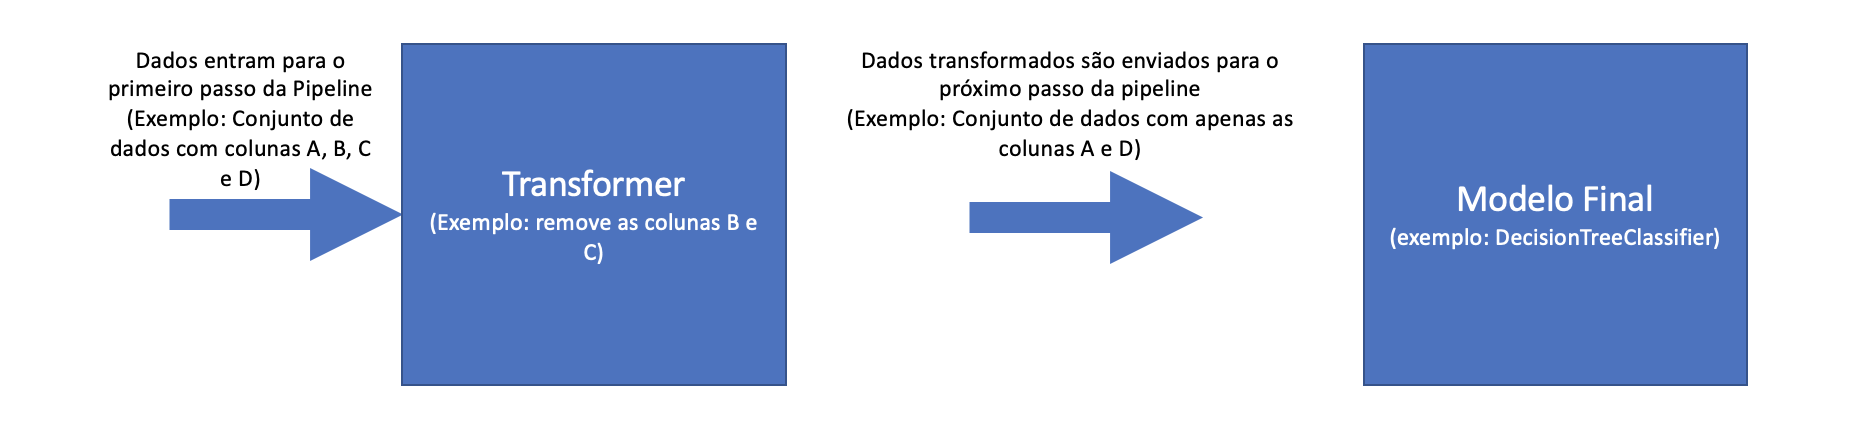

Nesse Notebook, vamos criar uma Pipeline muito similar ao exemplo acima, com dois estágios:

**drop_columns**: Remove as colunas indesejadas do conjunto de dados de entrada.

**classification**: Alimenta um modelo de classificação com os dados obtidos no estágio **drop_columns**, podendo ser tanto para treinamento quanto para obter uma predição.

**Criação de Pipelines** no scikit-learn

Para criar um modelo capaz de fazer transformações nos dados de entrada, vamos criar uma Pipeline do scikit-learn e aplicar nossas transformações dentro dos estágios dela.

Abaixo, definimos um transformador exemplo, que irá remover as colunas passadas como parâmetro em sua inicialização:

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


# Um transformador para remover colunas indesejadas
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Primeiro realizamos a cópia do DataFrame 'X' de entrada
        data = X.copy()
        # Retornamos um novo dataframe sem as colunas indesejadas
        return data.drop(labels=self.columns, axis='columns')

Tanto o método fit quanto o transform devem obrigatoriamente ser definidos, mesmo se não forem fazer nada de diferente, como no caso do fit acima.

Da mesma forma, você pode criar outros transformadores, para outros propósitos, sempre herdando das classes BaseEstimator e TransformerMixin. Você pode utilizar um transformador para, por exemplo, criar novas colunas, editar tipos de dados de colunas existentes, entre outros.

Agora, vamos criar uma Pipeline para utilização do nosso modelo, aceitando todas as colunas esperadas pelo desafio e removendo as que não queremos usar.

In [26]:
challenge_columns = ['ID', 'CHECKING_BALANCE', 'PAYMENT_TERM', 'CREDIT_HISTORY',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'EXISTING_SAVINGS',
       'EMPLOYMENT_DURATION', 'INSTALLMENT_PERCENT', 'SEX', 'OTHERS_ON_LOAN',
       'CURRENT_RESIDENCE_DURATION', 'PROPERTY', 'AGE', 'INSTALLMENT_PLANS',
       'HOUSING', 'EXISTING_CREDITS_COUNT', 'JOB_TYPE', 'DEPENDENTS',
       'TELEPHONE', 'FOREIGN_WORKER', 'ALLOW']

unwanted_columns = list((set(challenge_columns) - set(target)) - set(features)) # Remover todas as colunas que não são features do nosso modelo

In [27]:
# Criando uma instância do transformador, passando como parâmetro as colunas que não queremos
drop_columns = DropColumns(unwanted_columns)


# Criando a Pipeline, adicionando o nosso transformador seguido de um modelo de árvore de decisão
skl_pipeline = Pipeline(steps=[('drop_columns', drop_columns), ('classification', model)])

Pronto! Essa pipeline agora está pronta para receber todas as variáveis do desafio, apesar de o modelo só usar algumas.

**Deploy do modelo para o Watson Machine Learning (WML)**

Agora temos o modelo pronto para publicação, queremos deixá-lo online para que o sistema da Maratona possa testá-lo :)

Para isso, vamos utilizar a biblioteca IBM Watson Machine Learning, que permite realizar o encapsulamento de modelos de Machine Learning em APIs REST.

In [28]:
# Instalar a biblioteca do WML
!pip install -U ibm-watson-machine-learning

In [29]:
from ibm_watson_machine_learning import APIClient

Caso ainda não tiver criado, crie um serviço de Machine Learning aqui: https://cloud.ibm.com/catalog/services/machine-learning.

Insira suas credenciais para o serviço na célula abaixo.

Em location, insira o ID da região onde se encontra o seu serviço WML instanciado, de acordo com as possibilidades abaixo:

Dallas - us-south
London - eu-gb
Frankfurt - eu-de
Tokyo - jp-tok
Para a API key, você deve gerá-la aqui: https://cloud.ibm.com/iam/apikeys. Não compartilhe-a com ninguém! Uma API key dá acesso à sua conta IBM Cloud.

In [30]:
api_key = 'INSIRA SUA API KEY AQUI'
location = 'us-south' # Caso o WML estiver em uma região diferente, altere

wml_credentials = {
    "apikey": api_key,
    "url": 'https://' + location + '.ml.cloud.ibm.com'
}

client = APIClient(wml_credentials)

Error getting IAM Token.
Reason: <Response [400]>


WMLClientError: ignored

Crie um espaço para salvar o seu modelo. Você pode criá-lo aqui: https://dataplatform.cloud.ibm.com/ml-runtime/spaces?context=cpdaas

Quando criar o seu espaço, associe a instância do seu serviço WML ao espaço! Sem associar, você não conseguirá efetuar o deploy.

In [31]:
# Listar espaços criados na sua instância de WML
client.spaces.list(limit=10)

NameError: ignored

Copie o ID do seu espaço criado para o desafio e cole-o abaixo para utilizá-lo. Você deverá ver a mensagem 'SUCCESS' se o espaço estiver corretamente configurado.

In [32]:
space_id = 'cole aqui'
client.set.default_space(space_id)

NameError: ignored

**Utilização da Pipeline dentro do Watson Machine Learning (WML)**

Para utilizar uma Pipeline no WML com transformadores customizados, são necessários alguns passos adicionais:

1- Criar um pacote no Python contendo o transformador customizado;

2- Carregar esse pacote com o transformador em um repositório no WML;

3- Criar uma especificação de software, com esse pacote customizado, que vai ser utilizada como tempo de execução do modelo no WML.

Como exemplo, vamos utilizar um pacote já pronto, disponível aqui: https://github.com/vnderlev/watson-sklearn-transforms. Para configurar o pacote Python, são necessários alguns outros arquivos, mas a lógica do transformador criado se encontra neste arquivo. No caso, esse é o mesmo transformador que definimos aqui, ele vai excluir do conjunto de dados as colunas passadas como parâmetro na sua inicialização.

Abaixo, vamos baixar esse pacote do GitHub e instalá-lo no Python.

In [33]:
!rm -rf watson-sklearn-transforms # Remover a pasta caso já exista
!git clone https://github.com/vnderlev/watson-sklearn-transforms # Clonar o repositório com o pacote
!zip -r drop-columns.zip watson-sklearn-transforms # Zipar o pacote
!pip install drop-columns.zip # Instalar o pacote zipado

Cloning into 'watson-sklearn-transforms'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (59/59), done.
  adding: watson-sklearn-transforms/ (stored 0%)
  adding: watson-sklearn-transforms/my_custom_sklearn_transforms/ (stored 0%)
  adding: watson-sklearn-transforms/my_custom_sklearn_transforms/__init__.py (stored 0%)
  adding: watson-sklearn-transforms/my_custom_sklearn_transforms/sklearn_transformers.py (deflated 46%)
  adding: watson-sklearn-transforms/setup.py (deflated 46%)
  adding: watson-sklearn-transforms/my_custom_sklearn_transforms.egg-info/ (stored 0%)
  adding: watson-sklearn-transforms/my_custom_sklearn_transforms.egg-info/top_level.txt (stored 0%)
  adding: watson-sklearn-transforms/my_custom_sklearn_transforms.egg-info/not-zip-safe (stored 0%)
  adding: watson-sklearn-transforms/my_custom_sklearn_transforms.egg-info/dependency_links.txt (stored 0%)
  adding: watson-sklearn-transforms/my_cus

Vamos agora recriar nossa Pipeline utilizando esse pacote instalado.

In [34]:
from my_custom_sklearn_transforms.sklearn_transformers import DropColumns

drop_columns = DropColumns(unwanted_columns)

pipeline = Pipeline(steps=[('drop_columns', drop_columns), ('classification', model)])

Vamos agora subir o transformador customizado que baixamos para o WML.

In [35]:
# Metadados para o pacote customizado
meta_prop_pkg_extn = {
    client.package_extensions.ConfigurationMetaNames.NAME: "Drop_Columns",
    client.package_extensions.ConfigurationMetaNames.DESCRIPTION: "Extensão para remover colunas",
    client.package_extensions.ConfigurationMetaNames.TYPE: "pip_zip"
}

# Subir o pacote
pkg_extn_details = client.package_extensions.store(meta_props=meta_prop_pkg_extn, file_path="drop-columns.zip")

# Salvar as informações sobre o pacote
pkg_extn_uid = client.package_extensions.get_uid(pkg_extn_details)
pkg_extn_url = client.package_extensions.get_href(pkg_extn_details)

NameError: ignored

Vamos agora criar uma especificação de software com o nosso pacote customizado, para que o WML possa utilizar. Caso estiver utilizando um software diferente de Python 3.8 ou biblioteca diferente de scikit-learn, você pode dar uma olhada na lista de especificações de software suportadas pelo WML: https://dataplatform.cloud.ibm.com/docs/content/wsj/wmls/wmls-deploy-python-types.html?context=analytics&audience=wdp

In [36]:
base_sw_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")

# Caso queira utilizar um software diferente de Python 3.8 como base, dê uma olhada nos disponíveis com a linha abaixo
# client.software_specifications.list(limit=100)

NameError: ignored

In [37]:
# Metadados da nova especificação de software
meta_prop_sw_spec = {
    client.software_specifications.ConfigurationMetaNames.NAME: "sw_spec_drop_columns",
    client.software_specifications.ConfigurationMetaNames.DESCRIPTION: "Software specification utilizando DropColumns",
    client.software_specifications.ConfigurationMetaNames.BASE_SOFTWARE_SPECIFICATION: {"guid": base_sw_spec_uid}
}

# Criando a nova especificação de software e obtendo seu ID
sw_spec_details = client.software_specifications.store(meta_props=meta_prop_sw_spec)
sw_spec_uid = client.software_specifications.get_uid(sw_spec_details)

# Adicionando o pacote customizado à nova especificação
client.software_specifications.add_package_extension(sw_spec_uid, pkg_extn_uid)

NameError: ignored

Finalmente, vamos publicar a pipeline utilizando a especificação de software customizada que criamos.

In [38]:
# Metadados do modelo
model_props = {
    client.repository.ModelMetaNames.NAME: "Modelo com Pipeline customizada",
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sw_spec_uid
}

# Publicando a Pipeline como um modelo
published_model = client.repository.store_model(model=pipeline, meta_props=model_props)
published_model_uid = client.repository.get_model_uid(published_model)
client.repository.get_details(published_model_uid)

NameError: ignored

Seu modelo agora está salvo. Vamos agora deixá-lo disponível online, para que possamos testá-lo:

In [39]:
# Metadados para publicação do modelo
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Publicação do modelo customizado",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Publicar
created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)

NameError: ignored

Parabéns!
Seu modelo está agora publicado. Quando estiver pronto para submeter o desafio, você pode acessar https://maratona.dev/challenges/1, e utilizar as credenciais abaixo para realizar a submissão. Lembre-se de revisar todas as instruções no README antes de submeter!

In [40]:
deployment_uid = client.deployments.get_uid(created_deployment)

print(f"Credenciais para envio (não compartilhe esses dados com ninguém!)\n\nAPI key: {api_key}\nDeployment ID: {deployment_uid}")
 

NameError: ignored